In [4]:
%pprint

Pretty printing has been turned OFF


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools, operator
from d3blocks import D3Blocks
import os

In [8]:
fns = (x for x in os.listdir() if x.endswith(".json"))

In [10]:
dfs = []
for fn in fns:
    dfs.append(pd.read_json(fn))

In [11]:
alldf = pd.concat(dfs, ignore_index=True)

In [12]:
alldf.columns

Index(['article', 'byline', 'dates', 'newspaper_metadata', 'antitrust',
       'civil_rights', 'crime', 'govt_regulation', 'labor_movement',
       'politics', 'protests', 'ca_topic', 'ner_words', 'ner_labels',
       'wire_city', 'wire_state', 'wire_country', 'wire_coordinates',
       'wire_location_notes', 'people_mentioned', 'cluster_size', 'year'],
      dtype='object')

### topic cooccurance
+ not super interesting

In [7]:
# topicdf = alldf.loc[:, "antitrust":"protests"]

In [8]:
# coocc = topicdf.T.dot(topicdf)
# np.fill_diagonal(coocc.values, 0)

In [9]:
# coocc

In [10]:
# coocc_tups = []
# for i in range(7):
    # for j in range(i+1, 7):
        # coocc_tups.append((i, j, int(coocc.iloc[i, j])))

In [11]:
# coocc_tups

### newspaper cooccurance

In [13]:
def clean_name(n):
    return ''.join([l for l in list(n) if l.isalpha() or l in list(" -")])
def flat_news(list_of_dict):
    return [(clean_name(n["newspaper_title"]), 
             clean_name(n["newspaper_city"]), 
             clean_name(n["newspaper_state"])) for n in list_of_dict]

In [14]:
alldf["newspaper_names"] = alldf.newspaper_metadata.map(flat_news)

In [15]:
alldf.newspaper_names.sample(10)

116237    [(lawrence daily journal-world lawrence journa...
113469    [(daily inter lake, kalispell, montana), (clea...
82336     [(harrisonburg daily news, harrisonburg, virgi...
98060     [(kingsport times, kingsport, tennessee), (def...
9198      [(connellsville daily news, connellsville, pen...
79561     [(daily review, hayward, california), (el paso...
77597     [(greenville record-argus, greenville, pennsyl...
72191     [(washington ch record-herald, washington cour...
112421    [(albert lea tribune, albert lea, minnesota), ...
33321     [(titusville herald, titusville, pennsylvania)...
Name: newspaper_names, dtype: object

In [16]:
flatall = [x for y in alldf.newspaper_names for x in y]

In [18]:
len(set(flatall))

806

In [19]:
flatset = list(set(flatall))
# drop newspaper names that are clearly fuckups
# no state names should be more than two words
flatset = [x for x in flatset if len(x[-1].split())<=2]
# drop once duplicated state names
flatset = [x for x in flatset if not (len(x[-1].split())==2 and x[-1].split()[0]==x[-1].split()[1])]
# just the most common # jk i'm taking this part out
# flatset = [x for x in flatset if flatall.count(x)>=1000]

In [20]:
len(flatset)

737

In [21]:
# alldf.iloc[0:20].newspaper_names.map(lambda x: flatset[0] in x)

In [22]:
def format_name(ntup):
    return ntup[0].title() + " (" + ntup[1].title() + ", " + ntup[2].title() + ")"

In [28]:
format_name(flatset[0])

'Estherville Daily News (Estherville, Iowa)'

In [29]:
# sort by state
flatset = sorted(flatset, key=operator.itemgetter(2))

In [30]:
res = []
for n in flatset:
    res.append(alldf.newspaper_names.map(lambda x: int(n in x)).rename(n))

In [31]:
newsdf = pd.concat(res, axis=1)
newsdf.to_csv('coocc_df_ALL.csv')

In [27]:
newsdf = pd.read_csv('coocc_df.csv', index_col=0).reset_index(drop=True)

/tmp/ipykernel_16608/1456261965.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [41]:
paperdf = newsdf[0:2].T.reset_index().rename(columns={"index":"newspaper",0:"city",1:"state"})

In [45]:
datadf = newsdf[2:].astype(int)
datadf.sample(3)

,anniston star,cullman democrat,fairbanks daily news-miner,tucson daily citizen,yuma sun,scottsdale progress,douglas daily dispatch,yuma daily sun,arizona republic,casa grande dispatch,...,janesville gazette,stevens point daily journal,fond du lac reporter,sheboygan press,la crosse tribune,waukesha freeman,oshkosh daily northwestern,wisconsin rapids daily tribune,eau claire leader-telegram,wisconsin state journal
71096,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
51519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69744,1,0,1,0,1,0,0,0,0,1,...,0,1,1,1,1,0,0,0,0,0


In [46]:
news_coocc = datadf.T.dot(datadf)
np.fill_diagonal(news_coocc.values, 0)

In [47]:
coocc_cols = [n.title() for n in news_coocc.columns]

In [48]:
coocc_groups = [n.title() for n in paperdf.state]

In [49]:
coocc_groups

['Alabama', 'Alabama', 'Alaska', 'Arizona', 'Arizona', 'Arizona', 'Arizona', 'Arizona', 'Arizona', 'Arizona', 'Arizona', 'Arkansas', 'Arkansas', 'Arkansas', 'Arkansas', 'Arkansas', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'Colorado', 'Connecticut', 'Florida', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 'Iowa', 

#### heatmap

<Axes: >

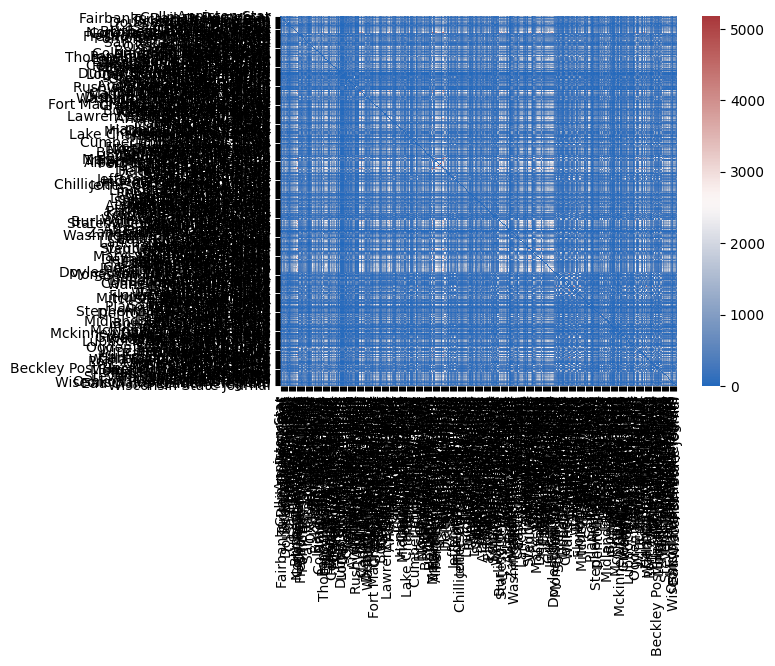

In [50]:
sns.heatmap(data=news_coocc, xticklabels = coocc_cols, yticklabels=coocc_cols, cmap="vlag")

#### chord

In [91]:
# reformat data for d3
news_stack = news_coocc.stack().reset_index()
# drop dups
news_stack["both"] = news_stack.level_0 + "&" + news_stack.level_1
news_stack.both = news_stack.both.map(lambda x: sorted(x.split('&')))

In [92]:
news_stack = news_stack.drop_duplicates(subset=["both"])

In [94]:
news_stack = news_stack.loc[:,["level_0","level_1",0]].rename(
    columns={"level_0":"source", "level_1":"target", 0:"weight"})

In [95]:
d3 = D3Blocks(chart='Chord', frame=False)
d3.set_node_properties(news_stack, opacity=0.2, cmap='tab20')
d3.set_edge_properties(news_stack, color='source', opacity='source')
d3.show()

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Open browser: /tmp/d3blocks/chord.html


### just pennsylvania

In [113]:
# just pennsylvania
allpenndf = newsdf.T.loc[newsdf.iloc[1]=="pennsylvania"].T

In [114]:
penndf = allpenndf[2:].astype(int)
penndf.sample(3)

,greenville record-argus,indiana evening gazette,lock haven express,evening sun,doylestown daily intelligencer,towanda daily review,monessen daily independent,bedford gazette,somerset daily american,kittanning times,...,warren times observer,titusville herald,gettysburg times,new castle news,bradford era,oil city derrick,clearfield progress,wayne independent,tyrone daily herald,evening standard
94134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56498,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
56613,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
penn_coocc = penndf.T.dot(penndf)
np.fill_diagonal(penn_coocc.values, 0)

In [120]:
penn_cols = [n.title() for n in penn_coocc.columns]

#### heatmap

[Text(0.5, 23.52222222222222, ''), Text(50.7222222222222, 0.5, ''), None]

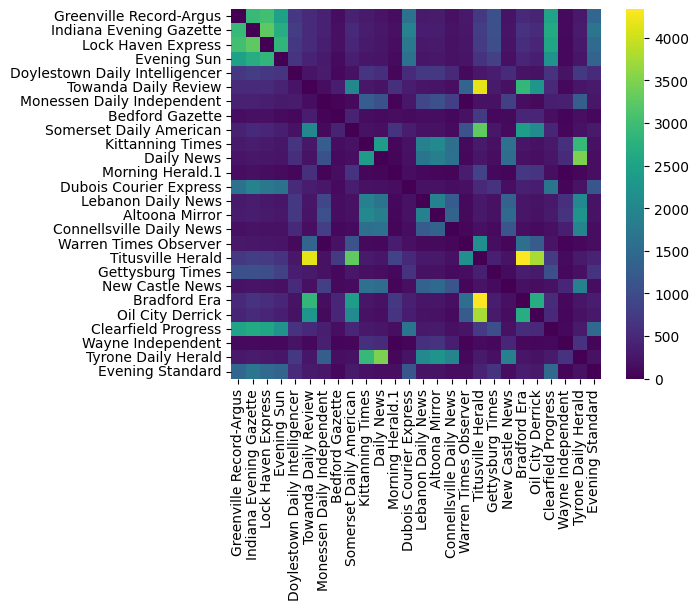

In [121]:
g = sns.heatmap(data=penn_coocc, 
            xticklabels = penn_cols, 
            yticklabels = penn_cols, 
            cmap="viridis")

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")

#### chord

In [129]:
# reformat data for d3
penn_stack = penn_coocc.stack().reset_index()
# drop dups
penn_stack["both"] = penn_stack.level_0 + "&" + penn_stack.level_1
penn_stack.both = penn_stack.both.map(lambda x: sorted(x.split('&')))

In [130]:
penn_stack = penn_stack.drop_duplicates(subset=["both"])

In [131]:
penn_stack = penn_stack.loc[:,["level_0","level_1",0]].rename(
    columns={"level_0":"source", "level_1":"target", 0:"weight"})
penn_stack.source = penn_stack.source.map(str.title)
penn_stack.target = penn_stack.target.map(str.title)

In [139]:
d3 = D3Blocks(chart='Chord', frame=False)
d3.set_node_properties(penn_stack, cmap='tab20')
d3.set_edge_properties(penn_stack, color='source', opacity='source')
d3.show()

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: /tmp/d3blocks/chord.html


In [136]:
penn_stack.source.value_counts()

source
Greenville Record-Argus           26
Indiana Evening Gazette           25
Lock Haven Express                24
Evening Sun                       23
Doylestown Daily Intelligencer    22
Towanda Daily Review              21
Monessen Daily Independent        20
Bedford Gazette                   19
Somerset Daily American           18
Kittanning Times                  17
Daily News                        16
Morning Herald.1                  15
Dubois Courier Express            14
Lebanon Daily News                13
Altoona Mirror                    12
Connellsville Daily News          11
Warren Times Observer             10
Titusville Herald                  9
Gettysburg Times                   8
New Castle News                    7
Bradford Era                       6
Oil City Derrick                   5
Clearfield Progress                4
Wayne Independent                  3
Tyrone Daily Herald                2
Evening Standard                   1
Name: count, dtype: int64

In [ ]:
p